In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

''

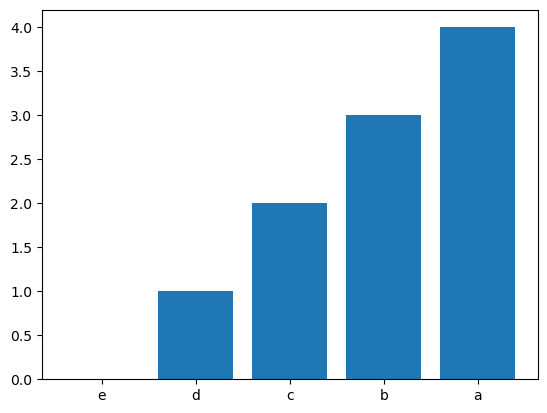

In [2]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a']
data = [0, 1, 2, 3, 4]
ax.bar(labels, data)

;

''

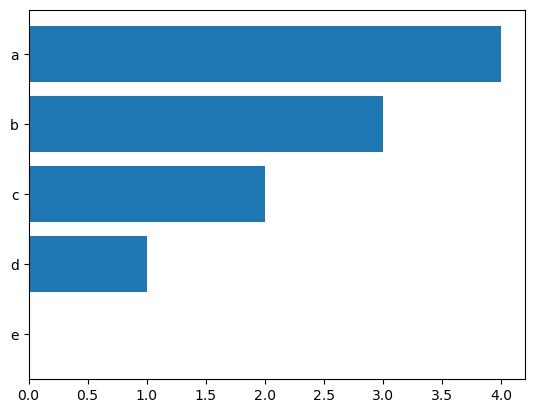

In [3]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a']
data = [0, 1, 2, 3, 4]
ax.barh(labels, data)

;

''

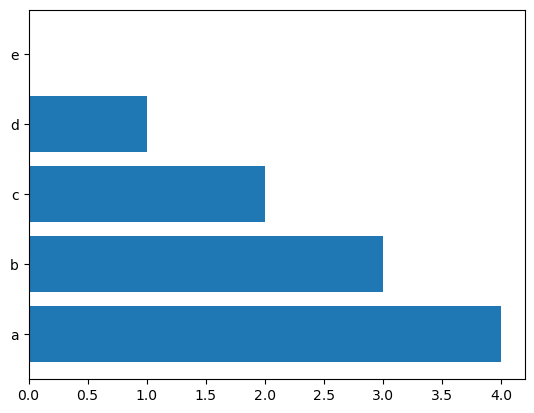

In [4]:
fig, ax = plt.subplots()

labels = ['e', 'd', 'c', 'b', 'a'][::-1] #reverse order
data = [0, 1, 2, 3, 4][::-1] #got to do both
ax.barh(labels, data)

;

In [5]:
housing_raw = pd.read_csv(
    '../Data/housing_data.csv',
    parse_dates = ['period_begin', 'period_end'],
    dtype = {'total_homes_sold' : 'Int32', 'region_name' : 'category'} 
) #category cuts down on processing time

In [31]:
ca_housing = (housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))]
              .assign(region_name = housing_raw['region_name']
                      .str[0:-11]).set_index('period_begin').sort_index())

ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [7]:
total_sold = (ca_housing
             .groupby('region_name')
             .agg({'total_homes_sold' : 'sum'})
              .sort_values('total_homes_sold', ascending = False)
              .iloc[:10]
             )

In [8]:
total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


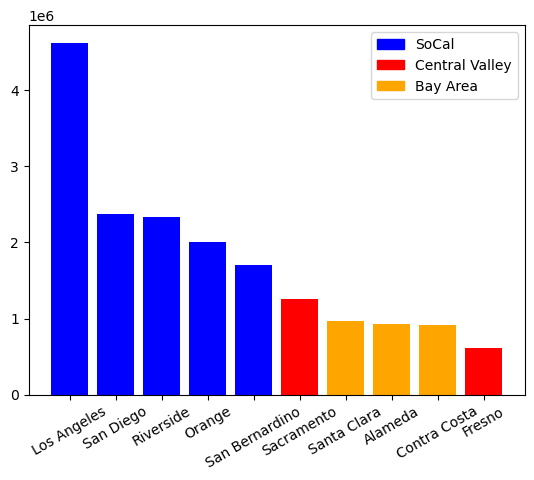

In [9]:
fig, ax = plt.subplots()
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'orange', 'orange', 'orange', 'red']

ax.bar(total_sold.index, total_sold['total_homes_sold'],
         color = colors)

socal = mpatches.Patch(color = 'blue', label = 'SoCal')
central = mpatches.Patch(color = 'red', label = "Central Valley")
bay = mpatches.Patch(color = 'orange', label = 'Bay Area')

plt.legend(handles = [socal, central, bay], loc = 'upper right')

ax.xaxis.set_tick_params(rotation = 30)

In [10]:
ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(["CA", "OR", "WA"])]

In [11]:
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [12]:
ca_or = ca_or.assign(
    price_range = pd.cut(
        ca_or.loc[:, "median_active_list_price"],
        [0, 400000, 600000, 2000000],
        labels = ["0-400K", "400-600K", "600K+"]),
    state = ca_or["region_name"].str[-2:]
)

In [13]:
ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400-600K,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400K,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400K,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400K,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400-600K,WA


In [14]:
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(index = 'price_range', 
                                                              columns = 'state',
                                                             values = 'inventory',
                                                             aggfunc = 'sum')
ca_or.head()

state,CA,OR,WA
price_range,,,
0-400K,4267.0,1074.0,2143.0
400-600K,13877.0,4711.0,4858.0
600K+,35147.0,1229.0,3649.0


''

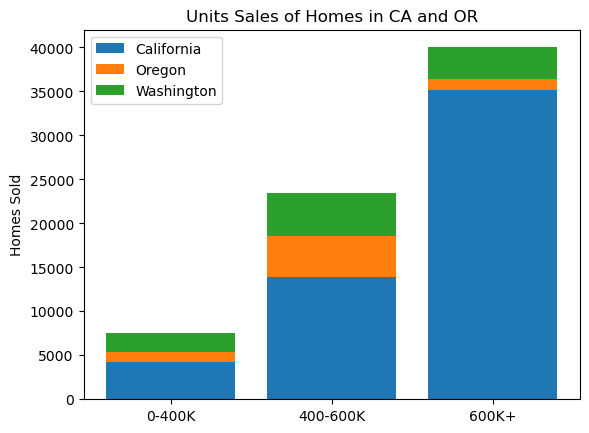

In [15]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label = "California"
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label = "Oregon",
    bottom = ca_or["CA"]
)

ax.bar(
    ca_or.index,
    ca_or['WA'],
    label = "Washington",
    bottom = ca_or["CA"] + ca_or["OR"]
)

ax.set_title("Units Sales of Homes in CA and OR")
ax.set_ylabel("Homes Sold")

ax.legend()
;

''

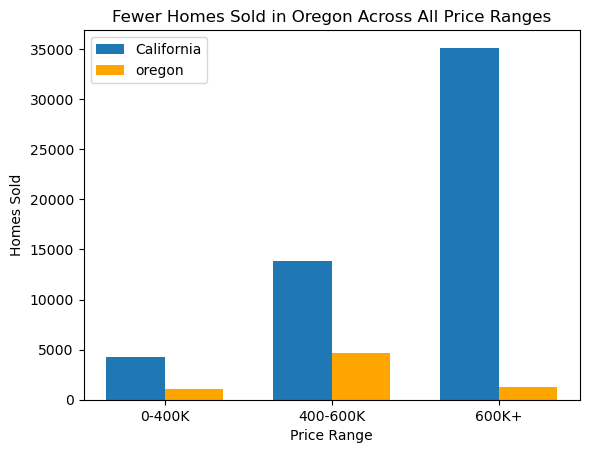

In [16]:
#easier to do in Seaborn or pandas Matplotlib API

fig, ax = plt.subplots()

width = .35
x = np.arange(3) #length of index

ax.bar(
    x-width/2,
    ca_or['CA'],
    width = width,
    label = "California"
)

ax.bar(x+width/2,
      ca_or['OR'],
       width = width,
       label = "oregon",
       color = 'orange'
      )
ax.set_title("Fewer Homes Sold in Oregon Across All Price Ranges")
ax.set_xlabel("Price Range")
ax.set_ylabel("Homes Sold")
ax.set_xticks(x)
ax.set_xticklabels(ca_or.index)

ax.legend()
;

In [17]:
ca_or2 = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(["CA", "OR", "WA"])]
ca_or2 = ca_or2.assign(
    price_range = pd.cut(
        ca_or2.loc[:, "median_active_list_price"],
        [0, 400000, 600000, 2000000],
        labels = ["0-400K", "400-600K", "600K+"]),
    state = ca_or2["region_name"].str[-2:])

In [18]:
ca_or2.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400-600K,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400K,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400K,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400K,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400-600K,WA


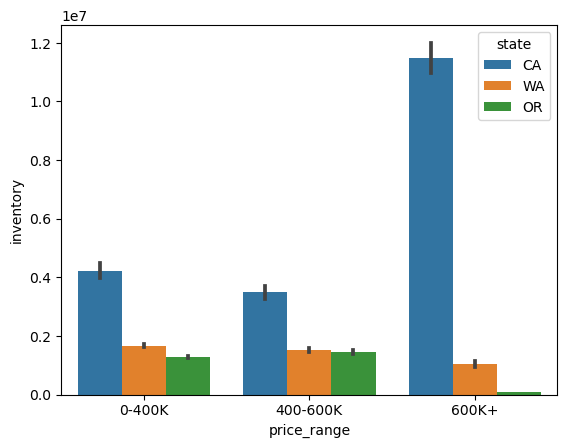

In [19]:
#Seaborn
sns.barplot(
    x ='price_range',
    y = 'inventory',
    hue = 'state',
    estimator = sum,
    data = ca_or2
);

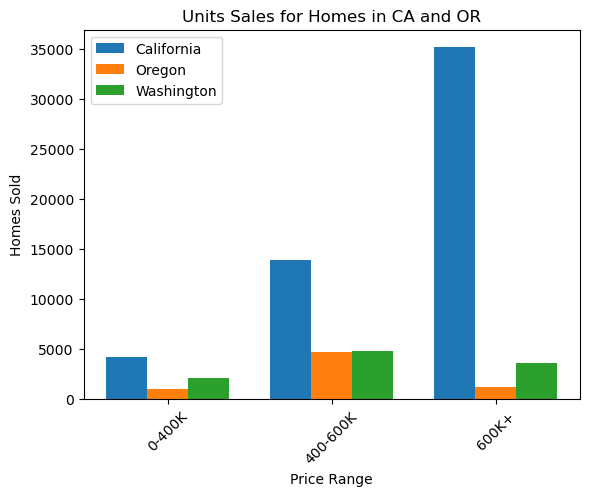

In [20]:
fig, ax =plt.subplots()

width = .25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1,
    ca_or["CA"],
    label = "California",
    width = width
)

ax.bar(
    x2,
    ca_or["OR"],
    label = "Oregon",
    width = width
)

ax.bar(
    x3,
    ca_or["WA"],
    label = "Washington",
    width = width
)

ax.set_title("Units Sales for Homes in CA and OR")
ax.set_ylabel("Homes Sold")
ax.set_xlabel("Price Range")
ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index)

plt.xticks(
    x2,
    ca_or.index,
    rotation = 45
)

ax.legend();

In [21]:
ca_or2.head(5)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_range,state
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794,400-600K,CA
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333,0-400K,WA
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000,0-400K,OR
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434,0-400K,WA
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617,400-600K,WA


In [24]:
cal_only = ca_or2[ca_or2['state'] == "CA"] 

cal_only = cal_only.drop(columns = ['region_name', 'period_end', 'total_homes_sold', 'active_listings', 
                                'age_of_inventory', 'months_of_supply', 'price_range', 'state']) 

result = cal_only.groupby(cal_only.period_begin.dt.to_period("Y")).median(['inventory', 'median_active_list_price']).round(0)

In [25]:
result.head()

,inventory,median_active_list_price
period_begin,,
2017,462.0,418783.0
2018,505.0,410358.0
2019,592.0,420600.0
2020,438.0,454938.0
2021,327.0,513353.0


''

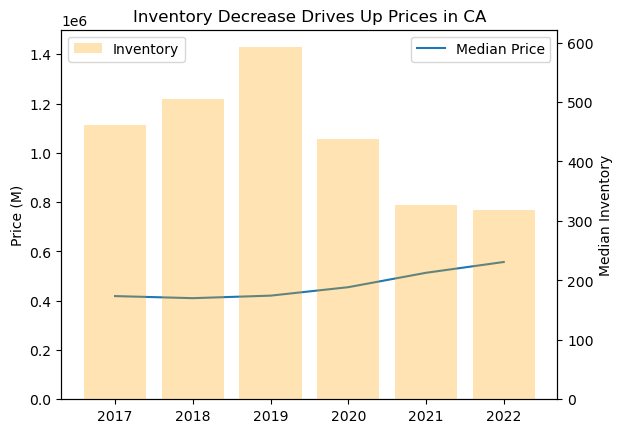

In [30]:
fig, ax = plt.subplots()
x = np.arange(2017, 2023)
ax.set_title("Inventory Decrease Drives Up Prices in CA")
ax.plot(x,
        result['median_active_list_price'],
        label = 'Median Price'
       )
ax.set_ylim(0, 1500000)
ax.set_ylabel("Price (M)")
ax.legend(loc = 'upper right')

ax2 = ax.twinx()

ax2.bar(x,
       result['inventory'],
        color = "orange",
        label = "Inventory",
        alpha = .3
       )
ax2.legend(loc = "upper left"),
ax2.set_ylabel("Median Inventory")
;

In [32]:
sd_dual = (ca_housing
          .loc[ca_housing['region_name'] == "San Diego",
                         ['inventory', 'median_active_list_price']]
               ).sort_index()
sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


''

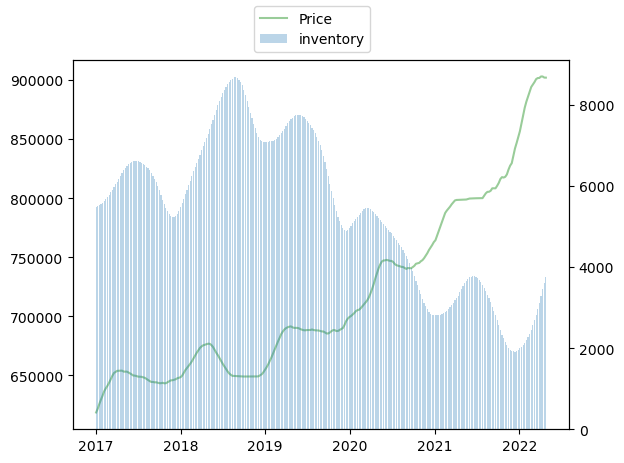

In [41]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    sd_dual['median_active_list_price'],
    color = 'green',
    alpha = .4,
    label = 'Price'
)

#ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual.index,
       sd_dual['inventory'],
        width= width,
        alpha = .3,
        label = 'inventory'
       )

#ax2.legend()

fig.legend(loc = 'upper center')
;

In [45]:
sd_dual2 = sd_dual.resample('Y').mean()
sd_dual2.head()

,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538


''

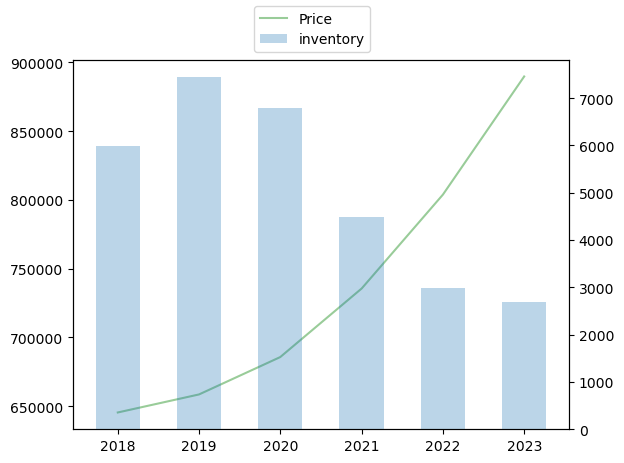

In [51]:
fig, ax = plt.subplots()

width = 200 #days, 365 will create a solid block

ax.plot(
    sd_dual2['median_active_list_price'],
    color = 'green',
    alpha = .4,
    label = 'Price'
)

#ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual2.index,
       sd_dual2['inventory'],
        width= width,
        alpha = .3,
        label = 'inventory'
       )

#ax2.legend()

fig.legend(loc = 'upper center')
;